##Mount google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Load environment

In [2]:
!cp -r /content/drive/MyDrive/pracownia/environment /content/environment

## Install lastest version from github

In [3]:
!git clone https://github.com/wfcommons/wfcommons wfcommons_lib
!pip install -q /content/wfcommons_lib

Cloning into 'wfcommons_lib'...
remote: Enumerating objects: 9585, done.
remote: Counting objects: 100% (1011/1011), done.
remote: Compressing objects: 100% (371/371), done.
remote: Total 9585 (delta 663), reused 782 (delta 635), pack-reused 8574
Receiving objects: 100% (9585/9585), 190.61 MiB | 24.16 MiB/s, done.
Resolving deltas: 100% (4113/4113), done.
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


##Install latest released version (there are some issues with wfgen)

In [4]:
# !python3 -m pip install -q wfcommons

In [5]:
!apt install -q libgraphviz-dev
!pip install -q pygraphviz

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 18 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgail18 amd64 2.24.33-2ubuntu2 [15.9 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgail-common

#Loading workflow instance

### Compatible for wfcommons 0.8 version, schema version 1.3

In [6]:
# import pathlib
# from wfcommons import Instance, InstanceAnalyzer

# # obtaining list of instance files in the folder
# INSTANCES_PATH = pathlib.Path('')
# instance_file = "Jobs_22.json"

# instance = Instance(input_instance=INSTANCES_PATH.joinpath(instance_file), schema_file="wfcommons-schema.json")

# instance.draw()

###Compatible for local install, latest wfcommons version

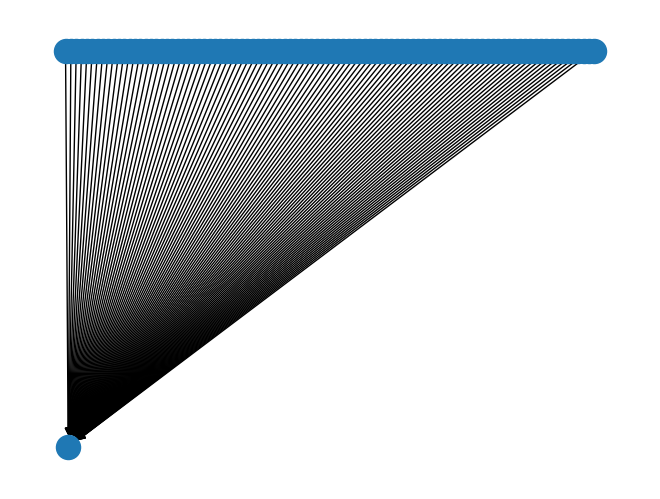

In [10]:
import pathlib
from wfcommons import Instance, InstanceAnalyzer

# obtaining list of instance files in the folder
ENV_PATH = pathlib.Path('environment/1.4')
instance_file = "seismology-chameleon-100p-001.json"
schema_file="wfcommons-schema.json"

instance = Instance(input_instance=ENV_PATH.joinpath(instance_file), schema_file=ENV_PATH.joinpath(schema_file))

instance.draw()

#Using Workflow Recipes

In [14]:
from wfcommons.wfchef.recipes import SeismologyRecipe
from wfcommons import WorkflowGenerator

recipe = SeismologyRecipe.from_num_tasks(250)
generator = WorkflowGenerator(recipe)
workflow = generator.build_workflow()
workflow.write_json(ENV_PATH.joinpath('seismology-workflow.json'))

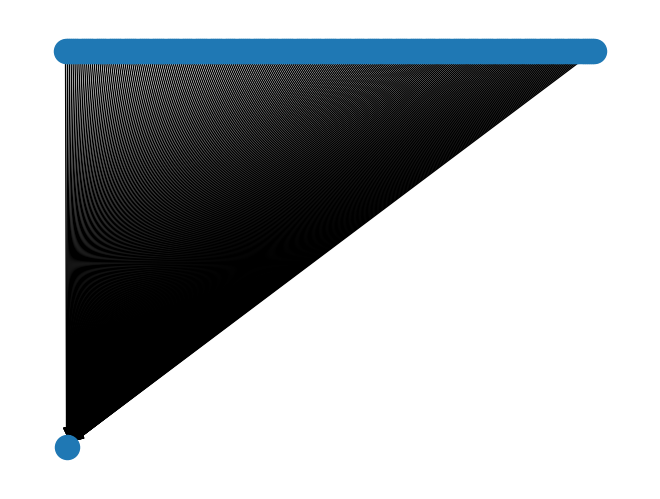

In [15]:
instance_file = "seismology-workflow.json"
instance = Instance(input_instance=ENV_PATH.joinpath(instance_file), schema_file=ENV_PATH.joinpath(schema_file))
instance.draw()